In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.max_columns',None)

In [79]:
train_df=pd.read_csv('Training_Missing_removed.csv',index_col='application_key')
# X=train_df.iloc[:,:-1]
# Y=train_df.iloc[:,-1]
drop_list=[10,44,40,39,34,30,29,22,14]
colm=[i for i in range(48)]
keep_col=[ i for i in range(48) if i not in drop_list]
train_df.columns=colm
train_df=train_df[keep_col]
colm=[i for i in range(39)]
train_df.columns=colm
train_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
application_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
230032,1696.0,1.6541,0.0,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,6423.0,3067.0,123875.0,1.0,1.0,1.0,3.0,3.0,94.78,8987.18,72.25,1462.0,4532.0,2890.0,61.0,4532.0,625.0,1.1667,1.0,8.0,10.0,4.0,1.0,0.08696,10.0,0.63899,0.0,0.0,0.0
230033,1846.0,0.8095,0.0,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,765.0,1931.0,42613.0,0.0,0.0,0.0,0.0,0.0,74.25,953.06,4.80,1028.0,2099.0,2099.0,30386.0,2281.0,169.0,0.4167,0.0,8.0,0.0,2.0,0.0,0.00000,13.0,0.63836,NaN,1.0,1.0
230034,1745.0,0.4001,0.0,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,NaN,NaN,76109.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,669.0,4623.0,NaN,25.0833,0.0,1.0,NaN,1.0,0.0,0.00000,1.0,1.00000,0.0,0.0,1.0


In [68]:
train_df.describe()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
count,76361.000000,74447.000000,79499.000000,79499.000000,79499.00000,61036.000000,7.260600e+04,61036.00000,6.859200e+04,7.949800e+04,35181.000000,65922.000000,7.164800e+04,8.000000e+04,4.793300e+04,61490.000000,64154.000000,65229.000000,79996.000000,79498.000000,57439.000000,50876.000000,39752.000000,61098.000000,72294.000000,69390.000000,66791.000000,79498.000000,79498.000000,43583.000000,23782.000000,72294.000000,78249.000000,79498.000000,46986.000000,77102.000000,72294.000000,79498.000000,73960.000000,17443.000000,25422.000000,78099.000000,79182.000000,72255.000000,35145.000000,57211.000000,80000.000000,80000.000000
mean,1745.971085,1.105629,5.280955,0.474516,1.12472,1606.702372,1.759581e+04,6773.68666,3.409744e+04,3.049237e+04,5342.149740,7124.405130,1.542968e+04,1.960918e+05,2.940801e+05,0.231582,0.266281,0.272026,0.945697,1.028252,57.790097,4423.856509,4305.929828,69.981834,1750.065303,3369.121848,3096.580153,8703.352223,5505.117412,2611.880274,3626.892986,470.430879,6.996557,0.230094,0.198123,6.417265,4.251362,4.286422,0.090819,98.497452,72.096758,0.335142,6.552777,0.705285,0.070736,0.096135,0.352000,0.246213
std,94.537617,1.645299,10.815463,1.796261,5.99545,3703.654127,4.708164e+04,10127.74526,5.337692e+04,6.717785e+04,13300.872733,11879.550129,5.723149e+04,7.888377e+06,2.997564e+05,0.622041,0.714537,0.719861,1.727162,1.776818,35.577165,3782.048321,3864.873106,300.080442,1306.001244,2931.242239,2695.058155,13499.173287,3222.652954,1564.307917,2028.647572,524.320849,7.650139,0.679609,0.569388,5.285543,4.685612,3.964464,0.419301,29.762399,24.442156,0.375656,6.311087,0.245879,0.287365,0.346109,0.477597,0.430806
min,1493.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.387000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083300,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.014000,0.000000,0.000000,0.000000,0.060660,0.000000,0.000000,0.000000,0.000000
25%,1679.000000,0.140100,0.000000,0.000000,0.00000,36.000000,1.756000e+03,490.00000,3.498000e+03,1.134000e+03,550.000000,706.000000,4.990000e+02,4.261300e+04,1.284020e+05,0.000000,0.000000,0.000000,0.000000,0.000000,26.930000,726.715000,541.157500,9.892500,821.000000,1125.000000,1034.000000,30.000000,3255.000000,1156.000000,2099.000000,97.000000,1.166700,0.000000,0.000000,3.000000,1.000000,2.000000,0.000000,90.689000,58.153000,0.000000,2.000000,0.515220,0.000000,0.000000,0.000000,0.000000
50%,1742.000000,0.538900,0.300000,0.000000,0.00000,297.000000,6.967000e+03,2478.00000,1.417100e+04,9.492500e+03,1780.000000,2977.500000,4.090000e+03,7.234300e+04,2.161520e+05,0.000000,0.000000,0.000000,0.000000,0.000000,59.690000,3974.425000,3700.000000,40.440000,1472.000000,2738.000000,2555.000000,243.000000,5019.000000,2829.000000,3528.000000,300.000000,3.916700,0.000000,0.000000,5.000000,3.000000,3.000000,0.000000,100.000000,78.883500,0.200000,5.000000,0.737030,0.000000,0.000000,0.000000,0.000000
75%,1810.000000,1.445050,6.447000,0.000000,0.00000,1343.250000,1.805575e+04,9684.25000,4.385375e+04,3.402550e+04,5047.000000,8660.000000,1.437025e+04,1.238750e+05,3.666700e+05,0.000000,0.000000,0.000000,1.000000,1.000000,86.620000,7579.297500,7520.950000,76.540000,2352.750000,4715.000000,4319.000000,30386.000000,7270.000000,3863.000000,4745.000000,667.000000,10.666700,0.000000,0.000000,8.000000,6.000000,6.000000,0.000000,111.698000,91.639750,0.571430,10.000000,0.943475,0.000000,0.000000,1.000000,0.000000
max,1950.000000,44.630100,286.858000,114.696000,226.

In [19]:
# from scipy import stats
# import numpy as np
# z = np.abs(stats.zscore(train_df))
# threshold = 3
# # print(np.where(z > 3))
# train_df=train_df[(z<3).all(axis=1)]

In [69]:
train_df.shape

(80000, 48)

In [ ]:
a=train_df.info()

In [80]:
# drop_list=[10,44,40,39,34,30,29,22,14]
# colm=[i for i in range(48)]
# keep_col=[ i for i in range(48) if i not in drop_list]
# train_df.columns=colm
# train_df=train_df[keep_col]
# colm=[i for i in range(39)]
# train_df.columns=colm

In [85]:
train_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
application_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
230032,1696.0,1.6541,0.0,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,6423.0,3067.0,123875.0,1.0,1.0,1.0,3.0,3.0,94.78,8987.18,72.25,1462.0,4532.0,2890.0,61.0,4532.0,625.0,1.1667,1.0,8.0,10.0,4.0,1.0,0.08696,10.0,0.63899,0.0,0.0,0.0
230033,1846.0,0.8095,0.0,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,765.0,1931.0,42613.0,0.0,0.0,0.0,0.0,0.0,74.25,953.06,4.80,1028.0,2099.0,2099.0,30386.0,2281.0,169.0,0.4167,0.0,8.0,0.0,2.0,0.0,0.00000,13.0,0.63836,NaN,1.0,1.0
230034,1745.0,0.4001,0.0,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,NaN,NaN,76109.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,669.0,4623.0,NaN,25.0833,0.0,1.0,NaN,1.0,0.0,0.00000,1.0,1.00000,0.0,0.0,1.0


In [86]:
train_df=train_df.replace(np.NaN,train_df.mean())

In [87]:
train_df.shape

(80000, 39)

In [88]:
train_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
application_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
230032,1696.0,1.6541,0.0,0.0,0.0,0.000000,6015.0,322.00000,40369.000000,18414.0,6423.00000,3067.000000,123875.0,1.000000,1.000000,1.000000,3.0,3.0,94.780000,8987.180000,72.250000,1462.000000,4532.000000,2890.000000,61.0,4532.0,625.000000,1.1667,1.0,8.0,10.000000,4.0,1.0,0.08696,10.0,0.63899,0.000000,0.0,0.0
230033,1846.0,0.8095,0.0,0.0,0.0,102.000000,7532.0,3171.00000,18234.000000,13664.0,765.00000,1931.000000,42613.0,0.000000,0.000000,0.000000,0.0,0.0,74.250000,953.060000,4.800000,1028.000000,2099.000000,2099.000000,30386.0,2281.0,169.000000,0.4167,0.0,8.0,0.000000,2.0,0.0,0.00000,13.0,0.63836,0.096135,1.0,1.0
230034,1745.0,0.4001,0.0,0.0,0.0,1606.702372,2536.0,6773.68666,34097.436013,2536.0,7124.40513,15429.679865,76109.0,0.231582,0.266281,0.272026,0.0,0.0,57.790097,4423.856509,69.981834,1750.065303,3369.121848,3096.580153,669.0,4623.0,470.430879,25.0833,0.0,1.0,4.251362,1.0,0.0,0.00000,1.0,1.00000,0.000000,0.0,1.0


In [89]:
train_df.to_csv('Traning_1_cleaned.csv')

In [90]:
lead_df=pd.read_csv('lead_board_cleaned.csv',index_col='application_key')

In [61]:
ind=[i for i in range(47)]
# lead_df.columns=ind
lead_df.columns=ind

In [62]:
lead_df=lead_df[keep_col[:-1]]

In [63]:
lead_df.head()

,0,1,2,3,4,5,6,7,8,9,11,12,13,15,16,17,18,19,20,21,23,24,25,26,27,28,31,32,33,35,36,37,38,41,42,43,45,46
application_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
350053,1753.0,0.5001,0.000,0.0,0.0,206.000000,19179.000000,206.000000,14221.000000,19438.0,785.000000,14922.843994,27748.0,0.000000,0.000000,0.000000,1.0,1.0,79.200000,7920.00000,79.20000,1141.0,152.0,152.0,1551.0,8486.0,450.0,13.0833,0.0,3.0,11.0,1.0,0.000000,0.42105,3.0,0.856610,0.000000,1.0
350054,1894.0,1.9701,0.000,0.0,0.0,297.000000,19820.000000,19820.000000,176895.000000,66346.0,1816.000000,944.000000,89190.0,0.000000,0.000000,0.000000,0.0,0.0,55.200000,627.59000,2.97000,2186.0,4563.0,4563.0,30386.0,10220.0,1222.0,1.8333,0.0,3.0,12.0,3.0,0.000000,0.00000,15.0,0.943910,0.000000,0.0
350055,1774.0,0.1718,0.000,0.0,0.0,197.000000,2563.000000,877.000000,8869.000000,3637.0,4079.000000,6999.000000,79280.0,0.000000,0.000000,0.000000,2.0,2.0,79.154000,4427.87677,79.15000,2068.0,5901.0,5901.0,1490.0,5901.0,340.0,0.9167,0.0,3.0,4.0,1.0,0.000000,0.33333,3.0,0.764670,0.000000,0.0
350056,1586.0,0.1123,5.299,0.0,0.0,1624.069192,17750.368864,6753.202313,33825.554662,0.0,7069.090188,14922.843994,69370.0,0.228886,0.261064,0.266823,0.0,0.0,57.885791,4427.87677,72.50052,1034.0,1095.0,1095.0,30.0,2281.0,34.0,0.5833,0.0,1.0,0.0,1.0,0.089912,1.50000,0.0,0.702558,0.092712,0.0
350057,1832.0,1.4442,0.000,0.0,0.0,179.000000,7577.000000,179.000000,21059.000000,20306.0,8740.000000,8012.000000,99100.0,0.000000,0.000000,0.000000,1.0,1.0,97.989000,4427.87677,97.99000,639.0,1764.0,1764.0,30386.0,4502.0,84.0,2.0000,0.0,17.0,0.0,3.0,0.000000,0.00000,23.0,0.791900,0.000000,1.0


In [64]:
train_df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 15, 16, 17, 18,
            19, 20, 21, 23, 24, 25, 26, 27, 28, 31, 32, 33, 35, 36, 37, 38, 41,
            42, 43, 45, 46, 47],
           dtype='int64')

In [65]:
lead_df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 15, 16, 17, 18,
            19, 20, 21, 23, 24, 25, 26, 27, 28, 31, 32, 33, 35, 36, 37, 38, 41,
            42, 43, 45, 46],
           dtype='int64')

In [66]:
lead_df.to_csv('lead_1_cleaned.csv')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
from matplotlib.pylab import rcParams
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
rcParams['figure.figsize'] = 12, 4

In [5]:
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], Y[:offset]
X_test, y_test = X[offset:], Y[offset:]
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.1813


Text(0,0.5,'Deviance')

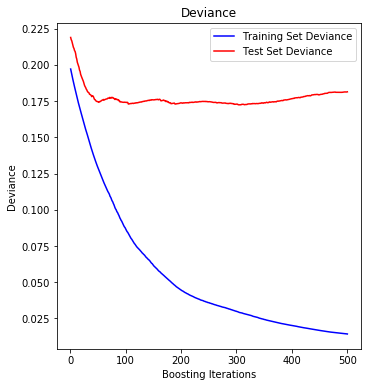

In [6]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

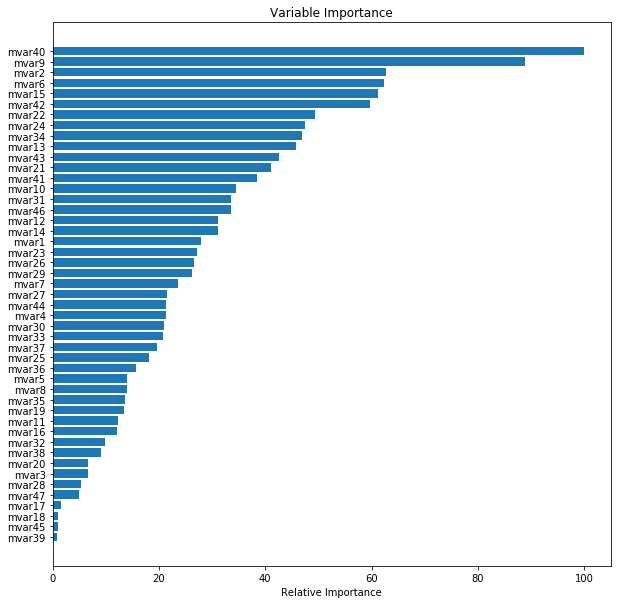

In [7]:
from PIL import Image 
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,10))
ax=plt.subplot(1, 1,1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
fig=plt.figure(figsize=(15,15))
plt.show()

In [8]:
sorted_idx

array([38, 44, 17, 16, 46, 27,  2, 19, 37, 31, 15, 10, 18, 34,  7,  4, 35,
       24, 36, 32, 29,  3, 43, 26,  6, 28, 25, 22,  0, 13, 11, 45, 30,  9,
       40, 20, 42, 12, 33, 23, 21, 41, 14,  5,  1,  8, 39], dtype=int64)